# Import librairies

In [1]:
import os
import sys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 15)
import tensorflow as tf
import keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import warnings

warnings.filterwarnings("ignore")
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.callbacks import Callback

disable_eager_execution()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import random

from sklearn.utils import shuffle

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))
print(tf.config.list_physical_devices())

print(K._get_available_gpus())

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-02-18 16:42:17.938937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:18.061391: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:18.062041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:18.088279: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the app

['/job:localhost/replica:0/task:0/device:GPU:0']


2022-02-18 16:42:21.191555: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:21.192321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:21.192371: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1609] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2022-02-18 16:42:21.193672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:21.194323: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/r

In [3]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=1)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

2022-02-18 16:42:21.236926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:21.238372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:21.241560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:21.249036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-02-18 16:42:21.249304: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1609] Could not ident

# Loading image

In [4]:
# Path from all downloaded satellites images
path = "../image_data/data"

In [5]:
# Get all file in the directorie
list_directories = os.listdir(path)

["['2000-04-16', '2000-10-15']",
 "('Andaman and Nicobar', 'Nicobar Islands').png"]

In [6]:
# Get the repartition of shapes of images
shapes = []
for i, dir in enumerate(list_directories):
    if i % 1000 == 0:
        print(i)
    try:
        im_frame = Image.open(os.path.join(path, dir))
        np_frame = np.array(im_frame)
        shapes.append(np_frame.shape)
    except Exception as e:
        print(i)
        print(e)
        print()
        pass

0


KeyboardInterrupt: 

In [31]:
np_frame = np.array(im_frame)

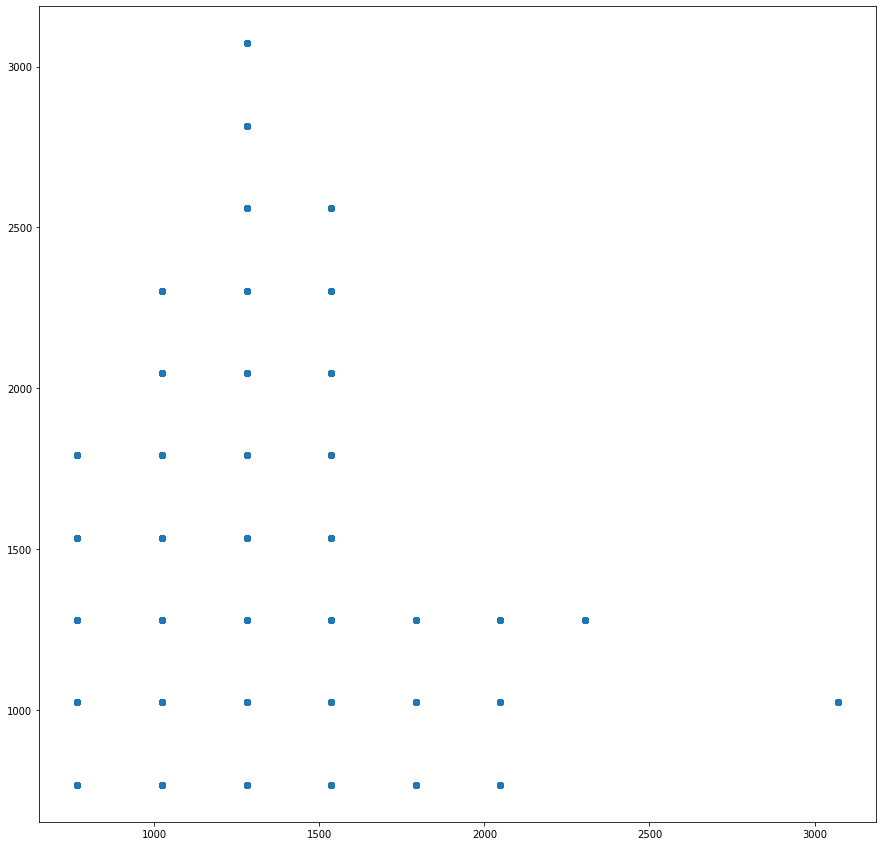

In [41]:
# Scatter plot of shapes
x = [elem[0] for elem in shapes]
y = [elem[1] for elem in shapes]
plt.scatter(x, y)

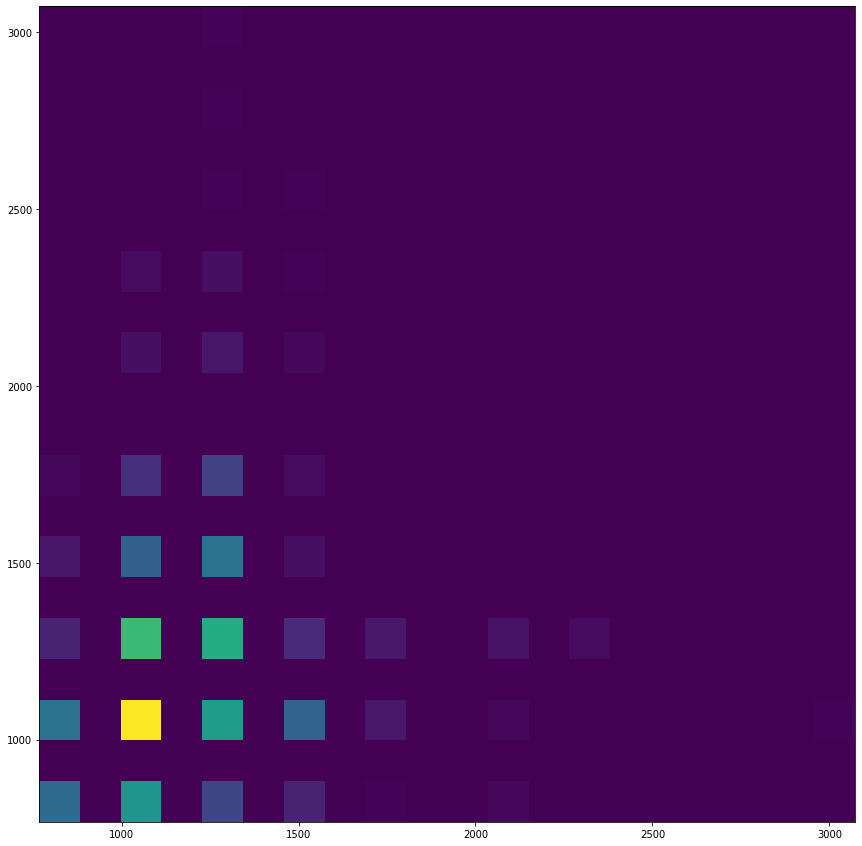

In [40]:
# Heatmap of shapes
heatmap, xedges, yedges = np.histogram2d(x, y, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin="lower")
plt.show()

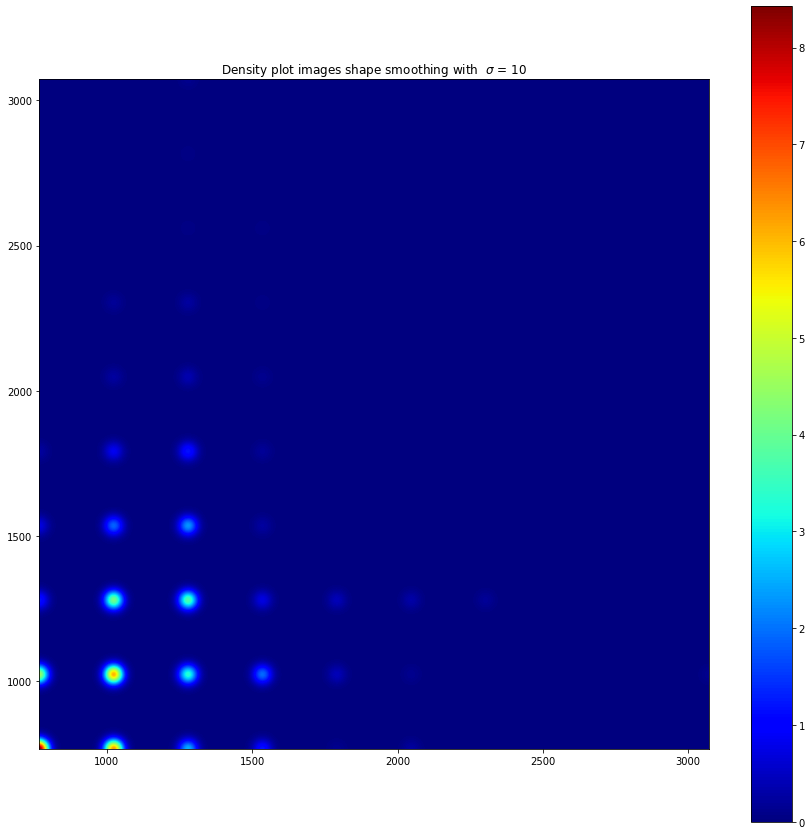

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

s = 10

# Density map of shapes
def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, ax = plt.subplots()


img, extent = myplot(x, y, s)
shw = ax.imshow(img, extent=extent, origin="lower", cmap=cm.jet)
ax.set_title("Density plot images shape smoothing with  $\sigma$ = %d" % s)
bar = plt.colorbar(shw)
plt.show()

# Model AE

In [6]:
# Define save model callbacks (because the run takes much time)
class BestModelCallback(Callback):
    def __init__(self, filename="../pre_trained_models/VAE/best-model.h5", verbose=0):
        self.filename = filename
        self.verbose = verbose
        self.loss = np.Inf
        os.makedirs(os.path.dirname(filename), mode=0o750, exist_ok=True)

    def on_train_begin(self, logs=None):
        self.loss = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if current < self.loss:
            self.loss = current
            self.model.save(self.filename)
            if self.verbose > 0:
                print(f"Saved - loss={current:.6f}")

In [7]:
# Shuffle images
nb_files = len(list_directories)  # 4000
list_directories = shuffle(list_directories[0:nb_files])

In [8]:
# Define Conv auto encoder
shape_img = 256
inputv = layers.Input(shape=(shape_img, shape_img, 3))
nb_layers = 64
kernel = (8, 8)
pooling_kernel = (2, 2)
# Encoder
x = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(inputv)
x = layers.MaxPooling2D(pooling_kernel, padding="same")(x)
x = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pooling_kernel, padding="same")(x)
x = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pooling_kernel, padding="same")(x)
x = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pooling_kernel, padding="same")(x)
x = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pooling_kernel, padding="same")(x)
x = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pooling_kernel, padding="same")(x)
encoder = Model(inputv, x, name="Encoder")
# Decoder

x = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(inputv, x, name="AE")
# keras.optimizers.SGD(learning_rate=0.05)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      12352     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      262208    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        262208   

https://github.com/tensorflow/tensorflow/issues/255

In [10]:
# Pre processing in the pipeline
def preprocessing(img):

    # # img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img, dtype=np.uint8)
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB).astype(np.uint8)
    channels = cv2.split(ycrcb)
    # channels[0] = cv2.equalizeHist(channels[0])

    # Histogramm equalization
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    img = cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR)
    img = np.array(img, dtype=np.float64)

    # VARIABILITY = 10
    # deviation = VARIABILITY*random.random()
    # noise = np.random.normal(0, deviation, img.shape)
    # img += noise
    img /= 255
    #
    return img

In [11]:
# Data generator for the training (due to the volume of data)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocessing, validation_split=0.2
)  # re-scale pixel values between [0,1]
batch_size = 40
train_generator = train_datagen.flow_from_directory(
    "../image_data",
    target_size=(shape_img, shape_img),
    color_mode="rgb",
    batch_size=batch_size,
    seed=42,
    class_mode="input",
    subset="training",
)

validation_generator = train_datagen.flow_from_directory(
    "../image_data",
    target_size=(shape_img, shape_img),
    color_mode="rgb",
    batch_size=batch_size,
    seed=42,
    class_mode="input",
    subset="validation",
)

Found 20232 images belonging to 1 classes.
Found 5058 images belonging to 1 classes.


For bce use : https://stats.stackexchange.com/questions/370179/why-binary-crossentropy-can-be-used-as-the-loss-function-in-autoencoders

In [12]:
# You could either load weights or train another model
autoencoder.load_weights("../pre_trained_models/VAE/best-model.h5")
# autoencoder.fit(train_generator,shuffle=True,
#                    steps_per_epoch = int((0.8*nb_files)//batch_size),
#                    epochs = 70,
#                    verbose = 1,
#                    validation_data = validation_generator,
#                     callbacks = [BestModelCallback(),keras.callbacks.TensorBoard(log_dir='../material/logs')],
#                    validation_steps = int((0.2*nb_files)//batch_size)
#                          )

In [97]:
# Test// Not relevant

# # Pre process the image
# img = cv2.imread(os.path.join(path, img_n))

# # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = np.array(img, dtype=np.uint8)
# # print(img.shape, img.dtype)
# ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB).astype(np.uint8)
# channels = cv2.split(ycrcb)
# # channels[0] = cv2.equalizeHist(channels[0])
# cv2.equalizeHist(channels[0], channels[0])
# cv2.merge(channels, ycrcb)
# img = cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR)
# img = np.array(img, dtype=np.float64)
# img /= 255
# img = cv2.resize(img, (shape_img, shape_img))

# # print(img.shape)

# img_reconstructed = np.reshape(img, [1] + list(img.shape))
# img_reconstructed = encoder.predict(img_reconstructed)
# img_reconstructed = np.reshape(img_reconstructed, (4, 4, 64))

(1280, 1280, 3) uint8


link :https://medium.com/@mrgarg.rajat/training-on-large-datasets-that-dont-fit-in-memory-in-keras-60a974785d71 

In [125]:
img_n = list_directories[6645]
test_file = Image.open(os.path.join(path, img_n))
test_frame = np.array(os.path.join(path))

In [126]:
img_reconstructed.shape

(256, 256, 3)

In [127]:
# test_frame = np.transpose(np.asarray([cv2.resize(np.array(Image.open(os.path.join(path,img_n)))[:,:,i], (shape_img, shape_img)) for i in range(3)] ), axes=[1, 2, 0])
# img2 = cv2.imread(os.path.join(path,img_n))
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Pre process the image
img = cv2.imread(os.path.join(path, img_n))

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = np.array(img, dtype=np.uint8)
print(img.shape, img.dtype)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB).astype(np.uint8)
channels = cv2.split(ycrcb)
# channels[0] = cv2.equalizeHist(channels[0])
cv2.equalizeHist(channels[0], channels[0])
cv2.merge(channels, ycrcb)
img = cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR)
img = np.array(img, dtype=np.float64)
img /= 255
img = cv2.resize(img, (shape_img, shape_img))

# print(img.shape)

img_reconstructed = np.reshape(img, [1] + list(img.shape))
# Reconstruction of the image from the autoencoder
img_reconstructed = autoencoder.predict(img_reconstructed)

# Reshape correctly the image
img *= 255
img_reconstructed *= 255


img_reconstructed = np.reshape(img_reconstructed, (shape_img, shape_img, 3))
img_reconstructed = np.floor(img_reconstructed).astype(np.uint8)
img = np.floor(img).astype(np.uint8)

# img_reconstructed=np.flipud(img_reconstructed).copy()
# img_reconstructed = cv2.cvtColor(img_reconstructed,cv2.COLOR_BGR2RGB)
# img_reconstructed = np.transpose(img_reconstructed, axes=[2, 3, 1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = np.reshape(img, [1] + list(img.shape))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_reconstructed = np.reshape(img_reconstructed,(shape_img, shape_img,3))
img = np.reshape(img, (shape_img, shape_img, 3))

(1024, 1024, 3) uint8


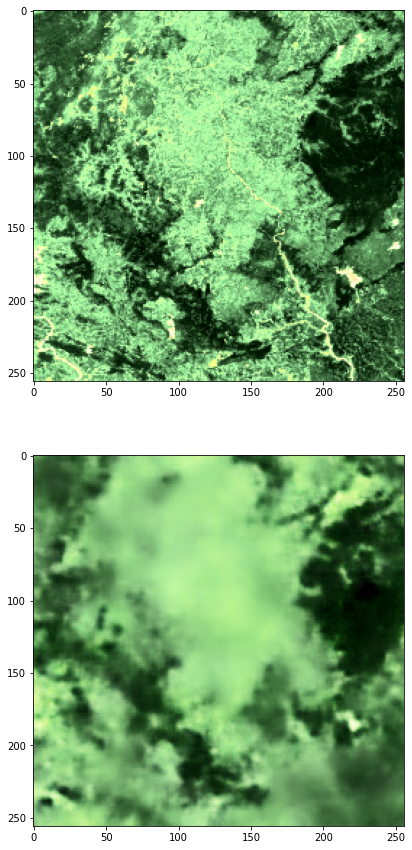

In [128]:
# Plot of the image
fig, ax = plt.subplots(2)
ax[0].imshow(img)
ax[1].imshow(img_reconstructed)

## Save encodings

In [22]:
# Generator with the whole dataset
total_datagen = ImageDataGenerator(
    preprocessing_function=preprocessing
)  # re-scale pixel values between [0,1]
batch_size = 40
total_generator = total_datagen.flow_from_directory(
    "../image_data",
    target_size=(shape_img, shape_img),
    color_mode="rgb",
    batch_size=batch_size,
    seed=42,
    class_mode="input",
)

Found 25290 images belonging to 1 classes.


In [23]:
len(list_directories)

25290

In [24]:
# Run encoding over the whole dataset and store it into np_array
i = 0
list_files = []
np_array = None
for x in total_generator:
    i += 1
    y = encoder.predict(x)
    try:
        np_array = np.append(np_array, y, axis=0)
    except:
        np_array = y
    # print(np_array.shape)
    idx = (total_generator.batch_index - 1) * total_generator.batch_size
    try:
        list_files.append(
            total_generator.filenames[idx : idx + total_generator.batch_size]
        )
    except:
        list_files = total_generator.filenames[idx : idx + total_generator.batch_size]

    if idx % 200 == 0:
        print(idx)
    if total_generator.batch_size * i >= len(list_directories):
        break
    # print(total_generator.filenames[idx : idx + total_generator.batch_size])
    # print(idx)
    # if i>=2:
    #     break

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20800
21000
21200
21400
21600
21800
22000
22200
22400
22600
22800
23000
23200
23400
23600
23800
24000
24200
24400
24600
24800
25000
25200
0


KeyboardInterrupt: 

In [27]:
np_array.shape

(25290, 4, 4, 64)

In [32]:
# Flatten list of files
list_files_flattened = [inside_elem for elem in list_files for inside_elem in elem]
list_files_flattened = list_files_flattened[: len(list_directories)]

In [35]:
# Use pandas to export to csv
df_list_names = pd.DataFrame(list_files_flattened)

In [41]:
# Save results
df_list_names.to_csv("../pre_trained_models/Encoder_prediction/list_files.csv")
np.save("../pre_trained_models/Encoder_prediction/encoding_array", np_array)

## With pipeline not keras

In [43]:
# Custom generator (if you want another type of generator)
class My_Custom_Generator(keras.utils.Sequence):
    def __init__(self, image_filenames, batch_size):
        self.image_filenames = image_filenames
        self.batch_size = batch_size

    def __len__(self):
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(
            np.int
        )

    def __getitem__(self, idx):
        batch_x = self.image_filenames[
            idx * self.batch_size : (idx + 1) * self.batch_size
        ]
        outputs = np.transpose(
            np.array(
                [
                    np.asarray(
                        [
                            cv2.resize(
                                np.array(
                                    Image.open(os.path.join(path, str(file_name)))
                                )[:, :, i],
                                (shape_img, shape_img),
                            )
                            for i in range(3)
                        ]
                    )
                    for file_name in batch_x
                ]
            )
            / 255.0,
            axes=[0, 2, 3, 1],
        )
        return outputs, outputs

In [45]:
batch_size = 30

my_training_batch_generator = My_Custom_Generator(X_train_filenames, batch_size)
my_validation_batch_generator = My_Custom_Generator(X_val_filenames, batch_size)

# Model VAE (experimental)

In [46]:
# Rate between two both losses in the model
reconstruction_rate = 0.7
kl_rate = 1 - reconstruction_rate

# Define loss function for the VAEs
def get_loss(distribution_mean, distribution_variance):
    def get_reconstruction_loss(y_true, y_pred):
        reconstruction_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        reconstruction_loss_batch = tf.reduce_mean(reconstruction_loss)
        return reconstruction_loss_batch

    def get_kl_loss(distribution_mean, distribution_variance):
        kl_loss = (
            1
            + distribution_variance
            - tf.square(distribution_mean)
            - tf.exp(distribution_variance)
        )
        kl_loss_batch = tf.reduce_mean(kl_loss)
        return -kl_loss_batch

    def total_loss(y_true, y_pred):
        reconstruction_loss_batch = get_reconstruction_loss(y_true, y_pred)
        kl_loss_batch = get_kl_loss(distribution_mean, distribution_variance)
        return reconstruction_rate * reconstruction_loss_batch + kl_rate * kl_loss_batch

    return total_loss

In [47]:
# Define the sample latent features for the latent distribution
def sample_latent_features(distribution):
    distribution_mean, distribution_variance = distribution
    batch_size = tf.shape(distribution_variance)[0]
    random = K.random_normal(shape=(batch_size, tf.shape(distribution_variance)[1]))
    return distribution_mean + tf.exp(0.5 * distribution_variance) * random


# Encoder model
shape_img = 128
inputv = layers.Input(shape=(shape_img, shape_img, 3))
nb_layers = 64
latent_dim = 512
kernel = (4, 4)
pooling_kernel = (2, 2)
# Encoder
xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(inputv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

# xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
# xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

# xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
# xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

# xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
# xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Flatten()(xv)
xv = layers.Dense(latent_dim + latent_dim)(xv)
distribution_mean, distribution_variance = tf.split(xv, num_or_size_splits=2, axis=1)
# distribution_mean = layers.Dense(2, name='mean')(xv)
# distribution_variance = layers.Dense(2, name='log_variance')(xv)
latent_encoding = layers.Lambda(sample_latent_features)(
    [distribution_mean, distribution_variance]
)

encoder_model = Model(inputv, latent_encoding, name="encoder")
encoder_model.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 128, 128, 64  3136        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 64, 64, 64)  0           ['conv2d_12[0][0]']              
 )                                                                                          

In [48]:
# Decoder part
shp = shape_img // (2 ** 5)
decoder_input = layers.Input(shape=(latent_dim))
# decoder  = layers.Dense(latent_dim)(decoder_input)
decoder = layers.Dense(shp * shp * nb_layers)(decoder_input)
decoder = layers.Reshape((shp, shp, nb_layers))(decoder)
# decoder = tensorflow.keras.layers.Conv2DTranspose(64, (3,3), activation='relu')(decoder)
# decoder  = layers.Conv2DTranspose(nb_layers, kernel, strides=2, activation="relu", padding="same")(decoder )
# decoder  = layers.Conv2DTranspose(nb_layers, kernel, strides=2, activation="relu", padding="same")(decoder )
# decoder  = layers.Conv2DTranspose(nb_layers, kernel, strides=2, activation="relu", padding="same")(decoder )
decoder = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(decoder)
decoder = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(decoder)
decoder = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(decoder)
decoder = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(decoder)
decoder = layers.Conv2DTranspose(
    nb_layers, kernel, strides=2, activation="relu", padding="same"
)(decoder)
decoder = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(decoder)

# Decoder model
decoder_model = Model(decoder_input, decoder, name="decoder")
decoder_model.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 64)          0         
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 8, 8, 64)         65600     
 Transpose)                                                      
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 16, 16, 64)       65600     
 Transpose)                                                      
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 32, 32, 64)       6560

In [49]:
# Whole VAE
encoded = encoder_model(inputv)
decoded = decoder_model(encoded)
autoencoder = Model(inputv, decoded, name="autoencoder")
# autoencoder.call = tf.function(autoencoder.call)

In [51]:
# Compile code
autoencoder.compile(
    loss=get_loss(distribution_mean, distribution_variance), optimizer="adam"
)
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 encoder (Functional)        (None, 512)               1315136   
                                                                 
 decoder (Functional)        (None, 128, 128, 3)       855043    
                                                                 
Total params: 2,170,179
Trainable params: 2,170,179
Non-trainable params: 0
_________________________________________________________________


In [52]:
from sklearn.utils import shuffle

nb_files = len(list_directories)  # 4000
list_directories = shuffle(list_directories[0:nb_files])

In [53]:
X_train_filenames, X_val_filenames = train_test_split(
    list_directories, test_size=0.2, random_state=42
)

In [54]:
# Custom generator
class My_Custom_Generator(keras.utils.Sequence):
    def __init__(self, image_filenames, batch_size):
        self.image_filenames = image_filenames
        self.batch_size = batch_size

    def __len__(self):
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(
            np.int
        )

    def __getitem__(self, idx):
        batch_x = self.image_filenames[
            idx * self.batch_size : (idx + 1) * self.batch_size
        ]
        outputs = np.transpose(
            np.array(
                [
                    np.asarray(
                        [
                            cv2.resize(
                                np.array(
                                    Image.open(os.path.join(path, str(file_name)))
                                )[:, :, i],
                                (shape_img, shape_img),
                            )
                            for i in range(3)
                        ]
                    )
                    for file_name in batch_x
                ]
            )
            / 255.0,
            axes=[0, 2, 3, 1],
        )
        return outputs, outputs

In [55]:
batch_size = 128

my_training_batch_generator = My_Custom_Generator(X_train_filenames, batch_size)
my_validation_batch_generator = My_Custom_Generator(X_val_filenames, batch_size)

In [56]:
from tensorflow.keras.callbacks import Callback
import numpy as np
import os


class BestModelCallback(Callback):
    def __init__(self, filename="../pre_trained_models/VAE/best-model.h5", verbose=0):
        self.filename = filename
        self.verbose = verbose
        self.loss = np.Inf
        os.makedirs(os.path.dirname(filename), mode=0o750, exist_ok=True)

    def on_train_begin(self, logs=None):
        self.loss = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if current < self.loss:
            self.loss = current
            self.model.save(self.filename)
            if self.verbose > 0:
                print(f"Saved - loss={current:.6f}")

In [58]:
# If you want to continue previous training
# autoencoder.load_weights('../pre_trained_models/VAE/best-model.h5')
# autoencoder = keras.load('../pre_trained_models/VAE/best-model.h5', custom_objects={'total_loss': get_loss(distribution_mean, distribution_variance)})
# Fit of the model
autoencoder.compile(
    loss=get_loss(distribution_mean, distribution_variance), optimizer="adam"
)
history = autoencoder.fit(
    my_training_batch_generator,
    shuffle=True,
    steps_per_epoch=int((0.8 * nb_files) // batch_size),
    epochs=5,
    verbose=1,
    # validation_data = my_validation_batch_generator,
    callbacks=[
        BestModelCallback(),
        keras.callbacks.TensorBoard(log_dir="../material/logs"),
    ]
    # validation_steps = int((0.2*nb_files)//batch_size)
)

Epoch 1/5


2022-02-07 19:42:18.096356: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 148.03MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-07 19:42:18.096431: W tensorflow/core/kernels/gpu_utils.cc:49] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2022-02-07 19:42:18.136431: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-07 19:42:18.136846: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) r

  1/158 [..............................] - ETA: 1:09:53 - batch: 0.0000e+00 - size: 128.0000 - loss: 0.4865

2022-02-07 19:42:37.213234: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-02-07 19:42:37.213294: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-02-07 19:42:37.214421: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-02-07 19:42:37.214471: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2022-02-07 19:42:37.214479: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-02-07 19:42:37.214483: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1682] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 


  2/158 [..............................] - ETA: 49:19 - batch: 0.5000 - size: 128.0000 - loss: 0.4855      

2022-02-07 19:42:37.716449: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-02-07 19:42:37.717150: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:140] cuptiFinalize: ignored due to a previous error.
2022-02-07 19:42:37.717196: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-02-07 19:42:37.717203: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1773] function cupti_interface_->Finalize()failed with error 
2022-02-07 19:42:37.721605: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-02-07 19:42:37.721657: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-02-07 19:42:37.721665: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:526]  GpuTracer has collected 0 callback api events and 0 a

  3/158 [..............................] - ETA: 53:55 - batch: 1.0000 - size: 128.0000 - loss: 0.4849

KeyboardInterrupt: 

In [ ]:
img_n = list_directories[3456]
test_file = Image.open(os.path.join(path, img_n))
test_frame = np.array(os.path.join(path))

In [ ]:
test_frame = np.transpose(
    np.asarray(
        [
            cv2.resize(
                np.array(Image.open(os.path.join(path, img_n)))[:, :, i],
                (shape_img, shape_img),
            )
            for i in range(3)
        ]
    ),
    axes=[1, 2, 0],
)
test_frame = np.reshape(test_frame, [1] + list(test_frame.shape))
print(test_frame.shape)
test_frame_reconstruct = autoencoder.predict(test_frame)

In [ ]:
test_frame_reconstruct = np.reshape(
    test_frame_reconstruct, test_frame_reconstruct.shape[1:]
)

In [70]:
test_frame_reconstruct.shape

(256, 256, 3)

In [71]:
test_frame = np.reshape(test_frame, test_frame.shape[1:])

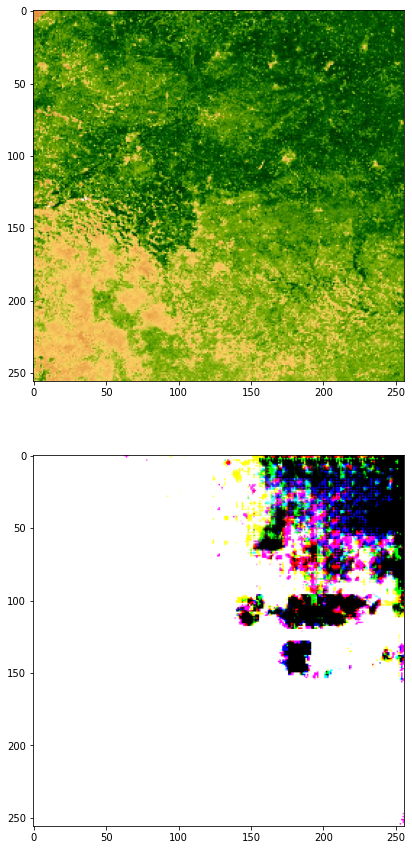

In [72]:
figure, ax = plt.subplots(2)
ax[0].imshow(test_frame)
ax[1].imshow(test_frame_reconstruct * 255)

# Model VAE with pipeline (experimental)

In [13]:
class BestModelCallback(Callback):
    def __init__(self, filename="../pre_trained_models/VAE/best-model.h5", verbose=0):
        self.filename = filename
        self.verbose = verbose
        self.loss = np.Inf
        os.makedirs(os.path.dirname(filename), mode=0o750, exist_ok=True)

    def on_train_begin(self, logs=None):
        self.loss = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if current < self.loss:
            self.loss = current
            self.model.save(self.filename)
            if self.verbose > 0:
                print(f"Saved - loss={current:.6f}")

In [14]:
def get_loss(distribution_mean, distribution_variance):
    def get_reconstruction_loss(y_true, y_pred):
        reconstruction_loss = tf.keras.losses.MeanSquaredError()(y_true, y_pred)
        reconstruction_loss_batch = tf.reduce_mean(reconstruction_loss)
        return reconstruction_loss_batch

    def get_kl_loss(distribution_mean, distribution_variance):
        kl_loss = (
            1
            + distribution_variance
            - tf.square(distribution_mean)
            - tf.exp(distribution_variance)
        )
        kl_loss_batch = tf.reduce_mean(kl_loss)
        return -kl_loss_batch

    def total_loss(y_true, y_pred):
        reconstruction_loss_batch = get_reconstruction_loss(y_true, y_pred)
        kl_loss_batch = get_kl_loss(distribution_mean, distribution_variance)
        return 0.95 * reconstruction_loss_batch + 0.05 * kl_loss_batch

    return total_loss

In [15]:
def sample_latent_features(distribution):
    distribution_mean, distribution_variance = distribution
    batch_size = tf.shape(distribution_variance)[0]
    random = K.random_normal(shape=(batch_size, tf.shape(distribution_variance)[1]))
    return distribution_mean + tf.exp(0.5 * distribution_variance) * random


batch_size = 64

shape_img = 128
inputv = layers.Input(shape=(shape_img, shape_img, 3))
nb_layers = 64
latent_dim = 1024
kernel = (4, 4)
pooling_kernel = (2, 2)
# Encoder
# xv = Rescaling(scale=1.0 / 255)(inputv)
xv = layers.Conv2D(
    nb_layers,
    kernel,
    activation="relu",
    padding="same",
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
)(inputv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Conv2D(
    nb_layers,
    kernel,
    activation="relu",
    padding="same",
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
)(xv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Conv2D(
    nb_layers,
    kernel,
    activation="relu",
    padding="same",
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
)(xv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Conv2D(
    nb_layers,
    kernel,
    activation="relu",
    padding="same",
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
)(xv)
xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

# xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same",kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(xv)
# xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

# xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
# xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

# xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
# xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

# xv = layers.Conv2D(nb_layers, kernel, activation="relu", padding="same")(xv)
# xv = layers.MaxPooling2D(pooling_kernel, padding="same")(xv)

xv = layers.Flatten()(xv)
xv = layers.Dense(latent_dim + latent_dim)(xv)
distribution_mean, distribution_variance = tf.split(xv, num_or_size_splits=2, axis=1)
# distribution_mean = layers.Dense(2, name='mean')(xv)
# distribution_variance = layers.Dense(2, name='log_variance')(xv)
latent_encoding = layers.Lambda(sample_latent_features)(
    [distribution_mean, distribution_variance]
)
# Decoder
encoder_model = Model(inputv, latent_encoding, name="encoder")
encoder_model.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 128, 128, 64  3136        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 64, 64, 64)  0           ['conv2d_7[0][0]']               
                                                                                            

In [16]:
shp = shape_img // (2 ** 4)
decoder_input = layers.Input(shape=(latent_dim))
# decoder  = layers.Dense(latent_dim)(decoder_input)
decoder = layers.Dense(shp * shp * nb_layers)(decoder_input)
decoder = layers.Reshape((shp, shp, nb_layers))(decoder)
# decoder = tensorflow.keras.layers.Conv2DTranspose(64, (3,3), activation='relu')(decoder)
# decoder  = layers.Conv2DTranspose(nb_layers, kernel, strides=2, activation="relu", padding="same")(decoder )
# decoder  = layers.Conv2DTranspose(nb_layers, kernel, strides=2, activation="relu", padding="same")(decoder )
# decoder  = layers.Conv2DTranspose(nb_layers, kernel, strides=2, activation="relu", padding="same")(decoder )
# decoder  = layers.Conv2DTranspose(nb_layers, kernel, strides=2, activation="relu", padding="same",kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(decoder )
decoder = layers.Conv2DTranspose(
    nb_layers,
    kernel,
    strides=2,
    activation="relu",
    padding="same",
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
)(decoder)
decoder = layers.Conv2DTranspose(
    nb_layers,
    kernel,
    strides=2,
    activation="relu",
    padding="same",
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
)(decoder)
decoder = layers.Conv2DTranspose(
    nb_layers,
    kernel,
    strides=2,
    activation="relu",
    padding="same",
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
)(decoder)
decoder = layers.Conv2DTranspose(
    nb_layers,
    kernel,
    strides=2,
    activation="relu",
    padding="same",
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
)(decoder)
decoder = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(decoder)

# Autoencoder
decoder_model = Model(decoder_input, decoder, name="decoder")
decoder_model.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_1 (Dense)             (None, 4096)              4198400   
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 64)       65600     
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 32, 32, 64)       65600     
 ranspose)                                                       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 64, 64, 64)       6560

In [17]:
encoded = encoder_model(inputv)
decoded = decoder_model(encoded)

In [18]:
autoencoder = Model(inputv, decoded, name="autoencoder")
# autoencoder.call = tf.function(autoencoder.call)

In [19]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 encoder (Functional)        (None, 1024)              8590592   
                                                                 
 decoder (Functional)        (None, 128, 128, 3)       4462531   
                                                                 
Total params: 13,053,123
Trainable params: 13,053,123
Non-trainable params: 0
_________________________________________________________________


In [20]:
img_n = list_directories[8945]
test_file = Image.open(os.path.join(path, img_n))
test_frame = np.array(os.path.join(path))

In [21]:
def preprocessing(img):

    # # img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img, dtype=np.uint8)
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB).astype(np.uint8)
    channels = cv2.split(ycrcb)
    # channels[0] = cv2.equalizeHist(channels[0])
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    img = np.array(img, dtype=np.float64)
    # Noise
    # VARIABILITY = 10
    # deviation = VARIABILITY*random.random()
    # noise = np.random.normal(0, deviation, img.shape)
    # img += noise
    img /= 255

    return img

https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/intro_to_keras_for_engineers.ipynb#scrollTo=EP22K1Lw16Zm

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

In [22]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocessing, validation_split=0.2
)  # re-scale pixel values between [0,1]

train_generator = train_datagen.flow_from_directory(
    "../image_data",
    target_size=(shape_img, shape_img),
    color_mode="rgb",
    batch_size=batch_size,
    seed=42,
    class_mode="input",
    subset="training",
)

validation_generator = train_datagen.flow_from_directory(
    "../image_data",
    target_size=(shape_img, shape_img),
    color_mode="rgb",
    batch_size=batch_size,
    seed=42,
    class_mode="input",
    subset="validation",
)

Found 20232 images belonging to 1 classes.
Found 5058 images belonging to 1 classes.


In [23]:
from sklearn.utils import shuffle

nb_files = len(list_directories)  # 4000
list_directories = shuffle(list_directories[0:nb_files])

In [24]:
# autoencoder.load_weights('../pre_trained_models/VAE/best-model.h5')
autoencoder.compile(
    loss=get_loss(distribution_mean, distribution_variance), optimizer="adam"
)
history = autoencoder.fit(
    train_generator,
    steps_per_epoch=int((0.8 * nb_files) // batch_size),
    epochs=120,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[
        BestModelCallback(),
        keras.callbacks.TensorBoard(log_dir="../material/logs"),
    ],
    validation_steps=int((0.2 * nb_files) // batch_size),
)

Epoch 1/120


2022-02-15 09:48:53.938885: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


  1/316 [..............................] - ETA: 37:26 - batch: 0.0000e+00 - size: 64.0000 - loss: 0.2759

2022-02-15 09:48:55.379945: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-02-15 09:48:55.380007: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-02-15 09:48:55.380961: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2022-02-15 09:48:55.381288: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2022-02-15 09:48:55.381582: E tensorflow/core/profiler/internal/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2022-02-15 09:48:55.381600: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1682] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2022-02-15 09:48:55.518031: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-02-15 09:4

  2/316 [..............................] - ETA: 1:36 - batch: 0.5000 - size: 64.0000 - loss: 0.2731     

2022-02-15 09:48:55.589100: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ../material/logs/plugins/profile/2022_02_15_09_48_55/d0625dc6479d.memory_profile.json.gz
2022-02-15 09:48:55.637270: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: ../material/logs/plugins/profile/2022_02_15_09_48_55
Dumped tool data for xplane.pb to ../material/logs/plugins/profile/2022_02_15_09_48_55/d0625dc6479d.xplane.pb
Dumped tool data for overview_page.pb to ../material/logs/plugins/profile/2022_02_15_09_48_55/d0625dc6479d.overview_page.pb
Dumped tool data for input_pipeline.pb to ../material/logs/plugins/profile/2022_02_15_09_48_55/d0625dc6479d.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to ../material/logs/plugins/profile/2022_02_15_09_48_55/d0625dc6479d.tensorflow_stats.pb
Dumped tool data for kernel_stats.pb to ../material/logs/plugins/profile/2022_02_15_09_48_55/d0625dc6479d.kernel_sta

316/316 [==============================] - 1374s 4s/step - batch: 157.5000 - size: 63.8228 - loss: 0.0984 - val_loss: 0.0856
Epoch 2/120
316/316 [==============================] - 1374s 4s/step - batch: 157.5000 - size: 63.8228 - loss: 0.0843 - val_loss: 0.0857
Epoch 3/120
316/316 [==============================] - 1360s 4s/step - batch: 157.5000 - size: 63.8228 - loss: 0.0843 - val_loss: 0.0856
Epoch 4/120
316/316 [==============================] - 1338s 4s/step - batch: 157.5000 - size: 63.8228 - loss: 0.0843 - val_loss: 0.0856
Epoch 5/120
316/316 [==============================] - 1366s 4s/step - batch: 157.5000 - size: 63.8228 - loss: 0.0843 - val_loss: 0.0855
Epoch 6/120
316/316 [==============================] - 1332s 4s/step - batch: 157.5000 - size: 63.8228 - loss: 0.0843 - val_loss: 0.0855
Epoch 7/120
204/316 [==================>...........] - ETA: 6:13 - batch: 101.5000 - size: 63.7255 - loss: 0.0842

KeyboardInterrupt: 

In [48]:
test_frame = np.transpose(
    np.asarray(
        [
            cv2.resize(
                np.array(Image.open(os.path.join(path, img_n)))[:, :, i],
                (shape_img, shape_img),
            )
            for i in range(3)
        ]
    ),
    axes=[1, 2, 0],
)
test_frame = np.reshape(test_frame, [1] + list(test_frame.shape))
print(test_frame.shape)
test_frame_reconstruct = autoencoder.predict(test_frame)

(1, 128, 128, 3)


In [198]:
img_n = list_directories[1234]
test_file = Image.open(os.path.join(path, img_n))
test_frame = np.array(os.path.join(path))

In [199]:
# test_frame = np.transpose(np.asarray([cv2.resize(np.array(Image.open(os.path.join(path,img_n)))[:,:,i], (shape_img, shape_img)) for i in range(3)] ), axes=[1, 2, 0])
# img2 = cv2.imread(os.path.join(path,img_n))
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img = cv2.imread(os.path.join(path, img_n))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = np.array(img, dtype=np.uint8)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB).astype(np.uint8)
channels = cv2.split(ycrcb)
# channels[0] = cv2.equalizeHist(channels[0])
cv2.equalizeHist(channels[0], channels[0])
cv2.merge(channels, ycrcb)
cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
img = np.array(img, dtype=np.float64)
img /= 255
img = cv2.resize(img, (shape_img, shape_img))

img_reconstructed = np.reshape(img, [1] + list(img.shape))
img_reconstructed = autoencoder.predict(img_reconstructed)
img_reconstructed = np.reshape(img_reconstructed, (shape_img, shape_img, 3))
# test_frame = np.reshape(test_frame,[1]+list(test_frame.shape))
# print(test_frame.shape)
# test_frame_reconstruct = autoencoder.predict(test_frame)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


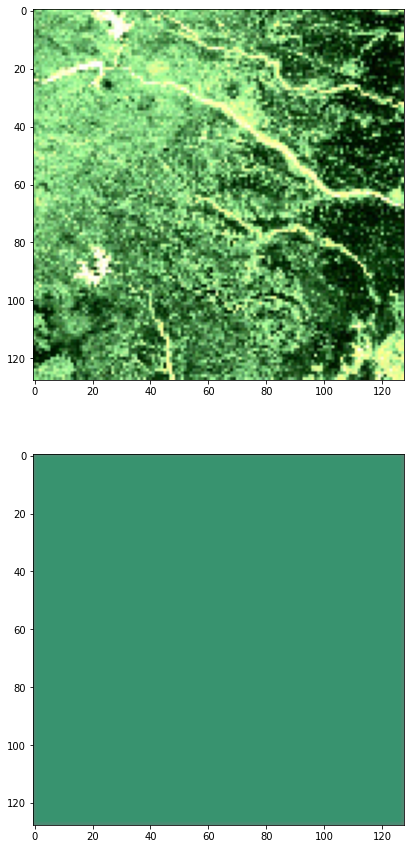

In [200]:
fig, ax = plt.subplots(2)
ax[0].imshow(img)
ax[1].imshow(img_reconstructed)